<a href="https://colab.research.google.com/github/narma-17/International-football-results-from-1872-to-2021/blob/main/Analysis_of_International_Football_Matches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analysis of International football results from 1872 to 2021

This notebook answers two questions based on the data of FIFA approved mens football matches from the year 1872 - 2021. The data set can be obtained from https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017 .
The two questions answered are;
1. What is the impact hosting a major tournament has on a country's chances of winning the most number of matches within the said tournament? 
2. What is the most successful(number of matches played against number of wins) team of all time and is there a specific period(era) that was dominated by teams?



In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ln -s /content/drive/My\ Drive/UoM\ Working\ Folders/Football/ /wd

ln: failed to create symbolic link '/wd/Football': File exists


In [ ]:
!ls /wd/

'ML Assignment'  'ML Assignment.ipynb'	 results.csv


In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('seaborn')
% matplotlib inline
import seaborn as sns

In [ ]:
# Set Matplotlib font sizes
S = 12
M = 15
L = 18
XL=21

plt.rc('font', size=S)          
plt.rc('axes', titlesize=L)     
plt.rc('axes', labelsize=M)    
plt.rc('xtick', labelsize=S)    
plt.rc('ytick', labelsize=S)    
plt.rc('legend', fontsize=S)    
plt.rc('figure', titlesize=XL)  

In [ ]:
df_og=pd.read_csv('/wd/results.csv')

In [ ]:
df_og.sample(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
12544,1983-04-16,Czechoslovakia,Cyprus,6,0,UEFA Euro qualification,Prague,Czechoslovakia,False
7968,1971-10-30,Malaysia,Singapore,1,1,Vietnam Independence Cup,Saigon,Vietnam Republic,True
14193,1986-05-11,Italy,China PR,2,0,Friendly,Naples,Italy,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
22543,2000-02-06,Cayman Islands,Jamaica,0,0,Friendly,George Town,Cayman Islands,False
14966,1988-05-28,Canada,Greece,0,0,Friendly,Toronto,Canada,False
729,1923-06-10,Sweden,Austria,4,2,Friendly,Gothenburg,Sweden,False
33736,2011-11-15,Poland,Hungary,2,1,Friendly,Poznań,Poland,False
33114,2011-06-19,Panama,El Salvador,1,1,Gold Cup,Washington,United States,True
28253,2006-04-08,Sri Lanka,Chinese Taipei,3,0,AFC Challenge Cup,Chittagong,Bangladesh,True


In [ ]:
df_og.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [ ]:
df_og['date']=pd.to_datetime(df_og['date'])

In [ ]:
for column in df_og.columns:
  if df_og[column].dtype == object:
    print(column,'has',len(df_og[column].unique()),'unique values')

home_team has 308 unique values
away_team has 305 unique values
tournament has 112 unique values
city has 2038 unique values
country has 266 unique values


## Question 1: Impact of Hosting a Tournament on the Number of Wins

In [ ]:
df1=df_og

In [ ]:
df1['tournament'].unique()

array(['Friendly', 'British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'CCCF Championship',
       'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'CONCACAF Championship',
       'Copa Juan Pinto Durán', 'UAFA Cup', 'South Pacific Games',
       'CONCACAF Championship qualificatio

**Major Tournaments**

NYU Stern Library defines major tournaments as including world cups, regional championships for national teams and regional championships for club teams.Thus the tournaments that will be considered are;
- FIFA World Cup
- AFC Asian Cup
- CAF African Cup of Nations
- CONCACAF Gold Cup
- CONMEBOL Copa America
- UEFA European Championship
- CONCACAF Champions League
- AFC Champions League
- CAF Champions League
- CONMEBOL Copa Libertadores
- UEFA Champions League
- OFC Champions League



In [ ]:
major_tournaments=['FIFA World Cup','AFC Asian Cup', 'African Cup of Nations','CONCACAF Nations League','Copa América','UEFA Nations League'
                    'CONCACAF Championship','UEFA Euro']

In [ ]:
df1_select=pd.DataFrame(columns=df1.columns)
for tournament in major_tournaments:
  temp_df=df1.loc[df1['tournament']==tournament]
  df1_select=df1_select.append(temp_df,ignore_index=True)

df1_select.sample(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
2520,1987-06-28,Paraguay,Bolivia,0,0,Copa América,Rosario,Argentina,True
954,1980-09-17,Iran,Syria,0,0,AFC Asian Cup,Kuwait City,Kuwait,True
2852,2019-06-16,Paraguay,Qatar,2,2,Copa América,Rio de Janeiro,Brazil,True
1847,2015-01-18,Zambia,DR Congo,1,1,African Cup of Nations,Ebebiyín,Equatorial Guinea,True
929,1972-05-07,South Korea,Iraq,0,0,AFC Asian Cup,Bangkok,Thailand,True


In [ ]:
df1_select['year']=pd.DatetimeIndex(df1_select['date']).year
df1_select['tournament_year']= df1_select['tournament']+' '+df1_select['year'].astype('str')

In [ ]:
df1_select['winning_team']='ABC'
for i in range(df1_select.shape[0]):
  if df1_select['home_score'].iloc[i]>df1_select['away_score'].iloc[i]:
    df1_select['winning_team'].iloc[i]=df1_select['home_team'].iloc[i]
  elif df1_select['home_score'].iloc[i]<df1_select['away_score'].iloc[i]:
    df1_select['winning_team'].iloc[i]=df1_select['away_team'].iloc[i]
  else:
    df1_select['winning_team'].iloc[i]='draw'


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
tournament_year=df1_select['tournament_year'].unique()
tournament_year=list(tournament_year)

In [ ]:
host_country=[]
to_remove=[]
for tournament in tournament_year:
  host= df1_select.loc[df1_select['tournament_year']==tournament]['country'].unique()
  if len(host)==1:
    host_country.append(host[0])
  else:
    to_remove.append(tournament)

for tournament in to_remove:
    tournament_year.remove(tournament)



In [ ]:
host_match_count=[]
to_remove=[]
for i in range(len(tournament_year)):
  grouped=df1_select[['home_team','home_score']].loc[df1_select['tournament_year']==tournament_year[i]].groupby('home_team',as_index=False).count()
  if grouped.loc[grouped['home_team']==host_country[i]].shape[0]>0:
    host_matches=grouped.loc[grouped['home_team']==host_country[i]]['home_score'].values[0]
    host_match_count.append(host_matches)
    #print('The host of',tournament_year[i]+','+host_country[i],'played',host_matches,'matches.')
  else:
    to_remove.append((tournament_year[i],host_country[i]))

for tup in to_remove:
    tournament_year.remove(tup[0])
    host_country.remove(tup[1])

In [ ]:
host_win_count=[]
for i in range(len(tournament_year)):
  grouped=df1_select[['winning_team','date']].loc[df1_select['tournament_year']==tournament_year[i]].groupby('winning_team',as_index=False).count()
  grouped.columns=['winning_team','win_count']
  if grouped.loc[grouped['winning_team']==host_country[i]].shape[0]!=0:
    host_wins=grouped.loc[grouped['winning_team']==host_country[i]]['win_count'].values[0]
    host_win_count.append(host_wins)
    #print('The host of',tournament_year[i]+','+host_country[i],'won',host_wins,'matches.')
  else:
    host_win_count.append(0)
    #print('The host of',tournament_year[i]+','+host_country[i],'won 0 matches.')


In [ ]:
most_wins_country=[]
most_wins_count=[]
for i in range(len(tournament_year)):
  grouped=df1_select[['winning_team','date']].loc[df1_select['tournament_year']==tournament_year[i]].groupby('winning_team',as_index=False).count()
  grouped.columns=['winning_team','win_count']
  grouped=grouped.sort_values(by='win_count',ascending=False)
  if grouped.iloc[0]['winning_team']!='draw':
    most_wins_country.append(grouped.iloc[0]['winning_team'])
    most_wins_count.append(grouped.iloc[0]['win_count'])
    #print(grouped.iloc[0]['winning_team'],'won most matches in',tournament_year[i],'winning',grouped.iloc[0]['win_count'],'matches')
  else:
    most_wins_country.append(grouped.iloc[1]['winning_team'])
    most_wins_count.append(grouped.iloc[1]['win_count'])
    #print(grouped.iloc[1]['winning_team'],'won most matches in',tournament_year[i],'winning',grouped.iloc[1]['win_count'],'matches')

In [ ]:
non_host_matches=[]
for i in range(len(tournament_year)):
  year=re.findall('[0-9]{4}',tournament_year[i])[0]
  grouped=df1_select[(df1_select['year']>=int(year)-2) & (df1_select['year']<=int(year)+2)]
  grouped=grouped[['home_team','away_team','date']].loc[grouped['country']!=host_country[i]]
  if grouped.shape[0]==0:
    non_host_matches.append(0)
    #print(host_country[i],'had 0 non host matches in major tournament during the period from',int(year)-2,'to',int(year)+2)
  else:
    home_team_temp=grouped[['home_team','date']]
    home_team_temp.columns=['team','date']
    away_team_temp=grouped[['away_team','date']]
    away_team_temp.columns=['team','date']
    grouped=home_team_temp.append(away_team_temp)
    grouped=grouped.groupby('team',as_index=False).count()
    if grouped.loc[grouped['team']==host_country[i]].shape[0]==0:
      non_host_matches.append(0)
      #print(host_country[i],'had 0 non host matches in major tournament during the period from',int(year)-2,'to',int(year)+2)
    else:
      non_host_match_count=grouped.loc[grouped['team']==host_country[i]]['date'].values[0]
      non_host_matches.append(non_host_match_count)
      #print(host_country[i],'had',non_host_match_count,'non host matches in major tournament during the period from',int(year)-2,'to',int(year)+2)


In [ ]:
non_host_win_count=[]
for i in range(len(tournament_year)):
  year=re.findall('[0-9]{4}',tournament_year[i])[0]
  #print(year)
  grouped=df1_select[(df1_select['year']>=int(year)-2) & (df1_select['year']<=int(year)+2)]
  grouped=grouped[['winning_team','date']].loc[grouped['country']!=host_country[i]].groupby('winning_team',as_index=False).count()
  grouped.columns=['winning_team','win_count']
  if grouped.loc[grouped['winning_team']==host_country[i]].shape[0]>0:
    non_host_wins=grouped.loc[grouped['winning_team']==host_country[i]]['win_count'].values[0]
    non_host_win_count.append(non_host_wins)
    #print(host_country[i],'had',non_host_wins,'major tournament non-host wins during the period from',int(year)-2,'to',int(year)+2)
  else:
    non_host_win_count.append(0)
    #print(host_country[i],'had 0 major tournament non-host wins during the period from',int(year)-2,'to',int(year)+2)


In [ ]:
host_mean_goals=[]
for i in range(len(tournament_year)):
  grouped=df1_select[['home_team','home_score']].loc[df1_select['tournament_year']==tournament_year[i]]
  grouped['home_score']=grouped['home_score'].astype('int')
  grouped=grouped.groupby('home_team',as_index=False).mean()
  host_mean_goal=grouped.loc[grouped['home_team']==host_country[i]]['home_score'].values[0]
  host_mean_goals.append(host_mean_goal)


In [ ]:
non_host_mean_goals=[]
for i in range(len(tournament_year)):
  year=re.findall('[0-9]{4}',tournament_year[i])[0]
  grouped=df1_select[(df1_select['year']>=int(year)-2) & (df1_select['year']<=int(year)+2)]
  home_team_temp=grouped[['home_team','home_score']]
  home_team_temp.columns=['team','score']
  away_team_temp=grouped[['away_team','away_score']]
  away_team_temp.columns=['team','score']
  grouped=home_team_temp.append(away_team_temp)
  grouped['score']=grouped['score'].astype('int')
  grouped=grouped.groupby('team',as_index=False).mean()
  if grouped.loc[grouped['team']==host_country[i]].shape[0]!=0:
    non_host_mean=grouped.loc[grouped['team']==host_country[i]]['score'].values[0]
    non_host_mean_goals.append(non_host_mean)
  else:
    non_host_mean_goals.append(np.nan)

In [ ]:
data_dict={}
data_dict['tournament_year']=tournament_year
data_dict['host_country']=host_country
data_dict['host_match_count']=host_match_count
data_dict['host_win_count']=host_win_count
data_dict['most_win_country']=most_wins_country
data_dict['most_win_count']=most_wins_count
data_dict['non_host_matches']=non_host_matches
data_dict['non_host_win_count']=non_host_win_count
data_dict['host_mean_goals']=host_mean_goals
data_dict['non_host_mean_goals']=non_host_mean_goals

In [ ]:
df1_final=pd.DataFrame.from_dict(data_dict)
df1_final.head()

,tournament_year,host_country,host_match_count,host_win_count,most_win_country,most_win_count,non_host_matches,non_host_win_count,host_mean_goals,non_host_mean_goals
0,FIFA World Cup 1930,Uruguay,4,4,Argentina,4,3,1,3.750000,2.714286
1,FIFA World Cup 1934,Italy,5,4,Italy,4,0,0,2.400000,2.400000
2,FIFA World Cup 1938,France,2,1,Italy,4,0,0,2.000000,2.000000
3,FIFA World Cup 1950,Brazil,6,4,Brazil,4,0,0,3.666667,4.857143
4,FIFA World Cup 1954,Switzerland,4,2,Germany,5,0,0,2.750000,2.750000


In [ ]:
df1_final['year']=df1_final['tournament_year'].str.findall(r'[0-9]{4}').apply(lambda x:int(x[0]))
df1_final['tournament']=df1_final['tournament_year'].str.findall(r'\D*').apply(lambda x:x[0].strip())
df1_final.sample(5)

,tournament_year,host_country,host_match_count,host_win_count,most_win_country,most_win_count,non_host_matches,non_host_win_count,host_mean_goals,non_host_mean_goals,year,tournament
85,Copa América 1947,Ecuador,7,0,Argentina,6,13,1,0.428571,0.950000,1947,Copa América
112,UEFA Euro 1980,Italy,4,1,Germany,3,14,8,0.500000,1.277778,1980,UEFA Euro
59,African Cup of Nations 2008,Ghana,6,5,Egypt,5,17,8,1.833333,1.130435,2008,African Cup of Nations
19,FIFA World Cup 2018,Russia,5,2,Belgium,6,3,0,2.200000,1.625000,2018,FIFA World Cup
62,African Cup of Nations 2015,Equatorial Guinea,6,2,Ghana,4,0,0,0.833333,0.833333,2015,African Cup of Nations


### **Percentage of major tournaments in which the host country is the country that scored the most goals**

In [ ]:
perc_host_wins=df1_final.loc[df1_final['host_country']==df1_final['most_win_country']].shape[0]/df1_final.shape[0]*100

print('The host has the highest number of wins in %d%% of the major tournaments' % perc_host_wins)

The host has the highest number of wins in 39% of the major tournaments


### **Comparison of the mean goals scored by a country when it is the host vs. when it is not the host**

In [ ]:
countries=df1_final['host_country'].unique()

In [ ]:
mean_goals_while_host=[]
mean_goals_non_host=[]

for country in countries:
  df1_temp=df1_final.loc[df1_final['host_country']==country]
  mean_goals_while_host.append(df1_temp['host_mean_goals'].mean())
  mean_goals_non_host.append(df1_temp['non_host_mean_goals'].mean())


In [ ]:
diff=[mean_goals_while_host[i]-mean_goals_non_host[i] for i in range(len(countries))]

zipped=list(zip(countries,mean_goals_while_host,mean_goals_non_host,diff))
zipped=sorted(zipped,key=lambda x: x[3],reverse=True)

countries=[x[0] for x in zipped]
mean_goals_while_host=[x[1] for x in zipped]
mean_goals_non_host=[x[2] for x in zipped]

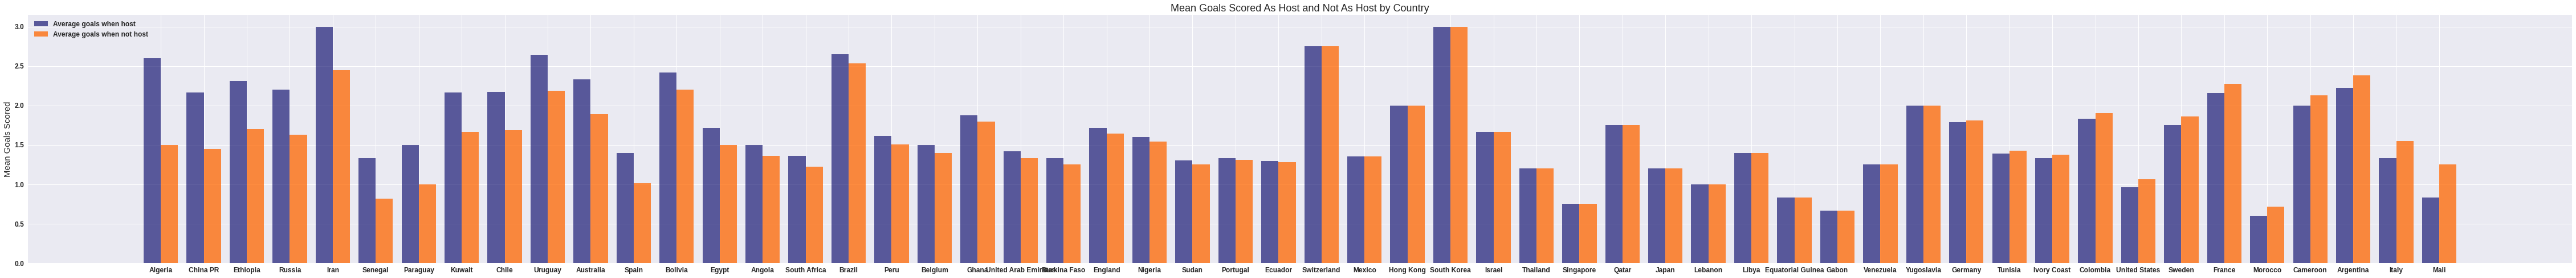

In [ ]:
plt.rcParams["figure.figsize"] = (80,8)

y_pos=np.arange(len(countries))
plt.bar(y_pos-0.2,mean_goals_while_host,align='center',width=0.4,color=(0,0,0.4,0.625),label='Average goals when host')
plt.bar(y_pos+0.2,mean_goals_non_host,align='center',width=0.4,color=(1,0.4,0,0.75),label='Average goals when not host')
plt.xticks(y_pos, countries)
plt.ylabel('Mean Goals Scored')
plt.title('Mean Goals Scored As Host and Not As Host by Country')
plt.legend(loc='upper left')
plt.show()



The above plot indicates that the presence of the host advantage varies accross countries. Some countries score more when they are the host compared to when they are not, while most countries score similar regardless of whether they are the host or not. 

### **Difference in mean goals by continent**

In [ ]:
df1_final['host_country'].unique()

array(['Uruguay', 'Italy', 'France', 'Brazil', 'Switzerland', 'Sweden',
       'Chile', 'England', 'Mexico', 'Germany', 'Argentina', 'Spain',
       'United States', 'South Africa', 'Russia', 'Hong Kong',
       'South Korea', 'Israel', 'Iran', 'Thailand', 'Kuwait', 'Singapore',
       'Qatar', 'Japan', 'United Arab Emirates', 'Lebanon', 'China PR',
       'Australia', 'Sudan', 'Ethiopia', 'Ghana', 'Tunisia', 'Cameroon',
       'Egypt', 'Nigeria', 'Libya', 'Ivory Coast', 'Morocco', 'Algeria',
       'Senegal', 'Burkina Faso', 'Mali', 'Angola', 'Equatorial Guinea',
       'Gabon', 'Peru', 'Ecuador', 'Bolivia', 'Paraguay', 'Colombia',
       'Venezuela', 'Belgium', 'Yugoslavia', 'Portugal'], dtype=object)

In [ ]:
Europe=['Italy', 'France','Switzerland', 'Sweden','England', 'Germany', 'Spain','Russia','Belgium', 'Yugoslavia', 'Portugal']
South_America=['Uruguay','Brazil','Chile','Argentina','Peru', 'Ecuador', 'Bolivia', 'Paraguay', 'Colombia','Venezuela']
North_America=['Mexico','United States']
Africa=['South Africa','Sudan', 'Ethiopia', 'Ghana', 'Tunisia', 'Cameroon','Algeria','Egypt', 'Nigeria', 'Libya', 'Ivory Coast', 
        'Morocco','Senegal', 'Burkina Faso', 'Mali','Angola', 'Equatorial Guinea','Gabon']
Asia=['Hong Kong','South Korea', 'Israel', 'Iran','Thailand', 'Kuwait', 'Singapore','Qatar', 'Japan', 'United Arab Emirates', 'Lebanon', 'China PR','Australia']

In [ ]:
def get_continent(x):
  if x in Europe:
    return 'Europe'
  elif x in South_America:
    return 'South America'
  elif x in North_America:
    return 'North America'
  elif x in Africa:
    return 'Africa'
  elif x in Asia:
    return 'Asia'
  else:
    return 'something wrong'

df1_final['continent']=df1_final['host_country'].apply(lambda x:get_continent(x))
df1_final['continent'].unique()

array(['South America', 'Europe', 'North America', 'Africa', 'Asia'],
      dtype=object)

In [ ]:
mean_goals_while_host=[]
mean_goals_non_host=[]
continents=df1_final['continent'].unique()

for continent in continents:
  df1_temp=df1_final.loc[df1_final['continent']==continent]
  mean_goals_while_host.append(df1_temp['host_mean_goals'].mean())
  mean_goals_non_host.append(df1_temp['non_host_mean_goals'].mean())

In [ ]:
diff=[mean_goals_while_host[i]-mean_goals_non_host[i] for i in range(len(continents))]

zipped=list(zip(continents,mean_goals_while_host,mean_goals_non_host,diff))
zipped=sorted(zipped,key=lambda x: x[3],reverse=True)

continents=[x[0] for x in zipped]
mean_goals_while_host=[x[1] for x in zipped]
mean_goals_non_host=[x[2] for x in zipped]

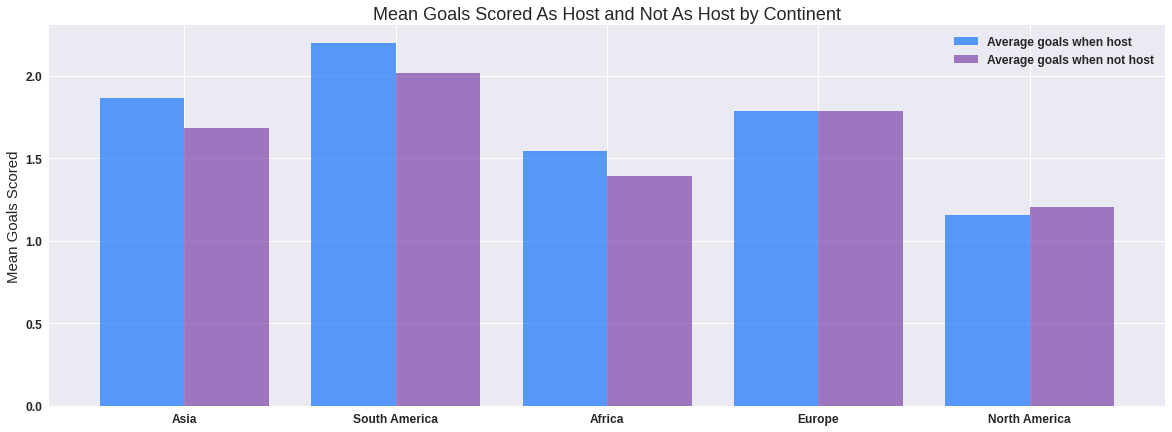

In [ ]:
plt.rcParams["figure.figsize"] = (20,7)

y_pos=np.arange(len(continents))
plt.bar(y_pos-0.2,mean_goals_while_host,align='center',width=0.4,color=(0,0.4,1,0.625),label='Average goals when host')
plt.bar(y_pos+0.2,mean_goals_non_host,align='center',width=0.4,color=(0.439,0.188,0.64,0.625),label='Average goals when not host')
plt.xticks(y_pos, continents)
plt.ylabel('Mean Goals Scored')
plt.title('Mean Goals Scored As Host and Not As Host by Continent')
plt.legend(loc='upper right')
plt.show()


The results based on continents reflects the results based countries that on average the number of goals scored does not significantly differ based on whether the country is the host or not. However, in the case of Africa, Asia and South America, the average goals scored while the host is slightly higher than when the country is not the host. 

### **Percentage of years the tournament is won by the host by tournament type**

In [ ]:
perc=[]
major_tournaments =df1_final['tournament'].unique()

for tournament in major_tournaments:
  df1_temp=df1_final.loc[df1_final['tournament']==tournament]
  perc_host_wins_by_tournament=df1_temp.loc[df1_temp['host_country']==df1_temp['most_win_country']].shape[0]/df1_temp.shape[0]*100
  perc.append(perc_host_wins_by_tournament)

zipped=list(zip(major_tournaments,perc))
zipped=sorted(zipped,key=lambda x: x[1],reverse=True)



In [ ]:
perc=[x[1] for x in zipped]
major_tournaments=[x[0] for x in zipped]

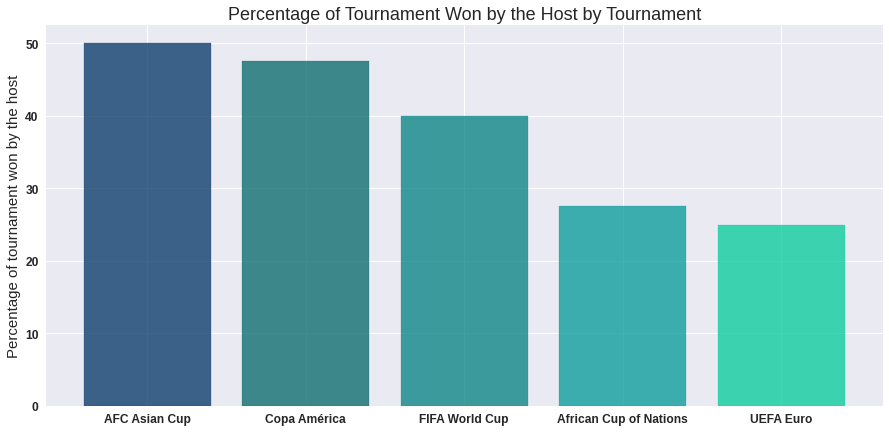

In [ ]:
plt.rcParams["figure.figsize"] = (15,7)

x_values=major_tournaments
y_pos=np.arange(len(x_values))
y_values=perc
barlist=plt.bar(y_pos,y_values,align='center')
barlist[0].set_color((0,0.2,0.4,0.75))
barlist[1].set_color((0,0.4,0.4,0.75))
barlist[2].set_color((0,0.5,0.5,0.75))
barlist[3].set_color((0,0.6,0.6,0.75))
barlist[4].set_color((0,0.8,0.6,0.75))
plt.xticks(y_pos, x_values)
plt.ylabel('Percentage of tournament won by the host')
plt.title('Percentage of Tournament Won by the Host by Tournament')
plt.show()

The AFC Asian cup favours the host with the host winning the most number of matches nearly 50% of the time. A simillar situation seems to be occuring in the Copa America tournament. The African Cup of Nations and the UEFA Euro seem to be more competitive, with the host winning the most number of matches less than 30% of the time.

## Question 2: Most Successful Team

In [ ]:
df2=df_og

In [ ]:
home_team_df=df2[['home_team','date']]
home_team_df.columns=['team','date']
away_team_df=df2[['away_team','date']]
away_team_df.columns=['team','date']
match_data_df=pd.concat([home_team_df,away_team_df])
match_count_df=match_data_df.groupby(['team'],as_index=False).count()

In [ ]:
match_count_df.columns=['country','no of matches']
match_count_df.sample(5)

,country,no of matches
305,Ynys Môn,61
244,Sierra Leone,256
112,Guadeloupe,236
67,Crimea,5
34,Bosnia and Herzegovina,230


In [ ]:
def who_wins(x):
  if x>0:
    x='home team'
  elif x<0:
    x='away team'
  else:
    x='draw'
  return x

df2['win']=df2['home_score']-df2['away_score']
df2['win']=df2['win'].apply(lambda x:who_wins(x))

In [ ]:
df2['winning_country']='ABC'
for i in range(df2.shape[0]):
  if df2['win'].iloc[i]=='home team':
    df2['winning_country'].iloc[i]=df2['home_team'].iloc[i]
  elif df2['win'].iloc[i]=='away team':
    df2['winning_country'].iloc[i]=df2['away_team'].iloc[i]
  else: 
    df2['winning_country'].iloc[i]='draw'


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
df2.sample(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,win,winning_country
37013,2015-06-13,South Africa,Gambia,0,0,African Cup of Nations qualification,Durban,South Africa,False,draw,draw
20453,1997-04-29,Chile,Venezuela,6,0,FIFA World Cup qualification,Santiago,Chile,False,home team,Chile
36398,2014-10-11,Malawi,Algeria,0,2,African Cup of Nations qualification,Blantyre,Malawi,False,away team,Algeria
7077,1969-04-16,Netherlands,Czechoslovakia,2,0,Friendly,Rotterdam,Netherlands,False,home team,Netherlands
26853,2004-08-18,Russia,Lithuania,4,3,Friendly,Moscow,Russia,False,home team,Russia


In [ ]:
win_count_df=df2[['winning_country','date']].groupby('winning_country',as_index=False).count()
win_count_df.columns=['country','no of wins']

In [ ]:
win_count_df=pd.merge(match_count_df,win_count_df,on='country')

In [ ]:
win_count_df.sample(5)

,country,no of matches,no of wins
293,Ynys Môn,61,32
41,Burkina Faso,392,126
266,Trinidad and Tobago,668,291
259,Tajikistan,149,59
233,Shetland,51,18


In [ ]:
win_count_df['percentage_wins']=win_count_df['no of wins']/win_count_df['no of matches']
win_count_df.sample(5)

,country,no of matches,no of wins,percentage_wins
274,Uganda,626,266,0.424920
157,Malawi,568,200,0.352113
245,South Ossetia,14,4,0.285714
244,South Korea,865,455,0.526012
198,Palestine,188,51,0.271277


In [ ]:
win_count_df.sort_values(by='no of matches',ascending=False,inplace=True)
win_count_df.loc[win_count_df['no of matches']>100].sort_values(by='percentage_wins',ascending=False).iloc[0]

country              Brazil
no of matches           985
no of wins              629
percentage_wins    0.638579
Name: 36, dtype: object

#### **Conclusion**

The most successful team of all time in terms of percentage of matches won is Brazil. (Only countries that have played more than a 100 matches have been considered).

### **Dominance by Era**
Dominance in an era has been defined here as being the team that ranked in the top 10 in terms of percentage wins for the most number of years in the decade. Only teams that have played atleast 10 matches a year are considered.

In [ ]:
dominance_df=pd.DataFrame(columns=['decade','country'])

In [ ]:
df2['year']=pd.DatetimeIndex(df2['date']).year
df2.sample(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,win,winning_country,year
17425,1993-01-25,Bolivia,Russia,1,2,Nehru Cup,Madras,India,True,away team,Russia,1993
9695,1976-04-17,Yugoslavia,Hungary,0,0,Friendly,Banja Luka,Yugoslavia,False,draw,draw,1976
5430,1963-06-04,Norway,Scotland,4,3,Friendly,Bergen,Norway,False,home team,Norway,1963
37887,2016-05-22,England,Turkey,2,1,Friendly,Manchester,England,False,home team,England,2016
14578,1987-06-21,Brazil,Ecuador,4,1,Friendly,Florianópolis,Brazil,False,home team,Brazil,1987


In [ ]:
df2_short=df2.loc[df2['year']>=1980]
df2_short.sample(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,win,winning_country,year
29672,2007-10-13,Slovenia,Albania,0,0,UEFA Euro qualification,Celje,Slovenia,False,draw,draw,2007
41561,2019-11-19,Saudi Arabia,Paraguay,0,0,Friendly,Riyadh,Saudi Arabia,False,draw,draw,2019
24502,2001-12-30,Oman,North Macedonia,2,0,Friendly,Muscat,Oman,False,home team,Oman,2001
36428,2014-10-13,Croatia,Azerbaijan,6,0,UEFA Euro qualification,Osijek,Croatia,False,home team,Croatia,2014
34211,2012-06-12,Greece,Czech Republic,1,2,UEFA Euro,Wrocław,Poland,True,away team,Czech Republic,2012


In [ ]:
df2_80s=df2_short[(df2_short['year']>=1980)& (df2_short['year']<1990)]
df2_90s=df2_short[(df2_short['year']>=1990)& (df2_short['year']<2000)]
df2_00s=df2_short[(df2_short['year']>=2000)& (df2_short['year']<2010)]
df2_recent=df2_short[(df2_short['year']>2010)]

1980s

In [ ]:
team_rank_df=pd.DataFrame(columns=['country','year','rank'])
for i in range(1980,1990):
  #print(i)
  df_temp=df2_80s[(df2_80s['year']==i)]
  min_matches=10 #df_temp.shape[0]*0.02
  home_team_temp=df_temp[['home_team','date']]
  home_team_temp.columns=['team','date']
  away_team_temp=df_temp[['away_team','date']]
  away_team_temp.columns=['team','date']
  match_data_temp=pd.concat([home_team_temp,away_team_temp])
  match_count_temp=match_data_temp.groupby(['team'],as_index=False).count()
  match_count_temp.columns=['country','no of matches']
  win_count_temp=df_temp[['winning_country','date']].groupby('winning_country',as_index=False).count()
  win_count_temp.columns=['country','no of wins']
  win_count_temp=pd.merge(match_count_temp[(match_count_temp['no of matches']>min_matches)],win_count_temp,on='country')
  win_count_temp['percentage_wins']=win_count_temp['no of wins']/win_count_temp['no of matches']
  win_count_temp['year']=i
  win_count_temp=win_count_temp.sort_values(by='percentage_wins',ascending=False).reset_index(drop=True).reset_index()
  win_count_temp['index']=win_count_temp['index']+1
  #print(win_count_temp.head())
  to_concat=win_count_temp[['country','year','index']].head(10)
  to_concat.columns=['country','year','rank']
  team_rank_df=team_rank_df.append(to_concat)

In [ ]:
#Get number of years a country has played the minimum number of matches
years_eligible_df=team_rank_df
years_eligible_df['eligible_this_year']=1
years_eligible_df=years_eligible_df[['country','year']].groupby('country',as_index=False).count()
years_eligible_df.columns=['country','years eligible']

In [ ]:
team_rank_df['rank']=team_rank_df['rank'].astype(int)
decade_summary_df=team_rank_df[['country','rank']].groupby('country',as_index=False).mean()
decade_summary_df=decade_summary_df.merge(years_eligible_df,on='country')
decade_top5=decade_summary_df[(decade_summary_df['years eligible']>=5)].sort_values(by='years eligible',ascending=False).head()
decade_top5



,country,rank,years eligible
39,South Korea,4.285714,7
14,Germany,4.333333,6
3,Brazil,3.000000,5
10,England,4.200000,5


In [ ]:
line_dict={}
line_dict['decade']='1980s'
line_dict['country']=decade_top5.iloc[0]['country']
dominance_df=dominance_df.append(line_dict,ignore_index=True)

1990s

In [ ]:
team_rank_df=pd.DataFrame(columns=['country','year','rank'])
for i in range(1990,2000):
  #print(i)
  df_temp=df2_90s[(df2_90s['year']==i)]
  min_matches=10 #df_temp.shape[0]*0.02
  home_team_temp=df_temp[['home_team','date']]
  home_team_temp.columns=['team','date']
  away_team_temp=df_temp[['away_team','date']]
  away_team_temp.columns=['team','date']
  match_data_temp=pd.concat([home_team_temp,away_team_temp])
  match_count_temp=match_data_temp.groupby(['team'],as_index=False).count()
  match_count_temp.columns=['country','no of matches']
  win_count_temp=df_temp[['winning_country','date']].groupby('winning_country',as_index=False).count()
  win_count_temp.columns=['country','no of wins']
  win_count_temp=pd.merge(match_count_temp[(match_count_temp['no of matches']>min_matches)],win_count_temp,on='country')
  win_count_temp['percentage_wins']=win_count_temp['no of wins']/win_count_temp['no of matches']
  win_count_temp['year']=i
  win_count_temp=win_count_temp.sort_values(by='percentage_wins',ascending=False).reset_index(drop=True).reset_index()
  win_count_temp['index']=win_count_temp['index']+1
  #print(win_count_temp.head())
  to_concat=win_count_temp[['country','year','index']].head(10)
  to_concat.columns=['country','year','rank']
  team_rank_df=team_rank_df.append(to_concat)

In [ ]:
years_eligible_df=team_rank_df
years_eligible_df['eligible_this_year']=1
years_eligible_df=years_eligible_df[['country','year']].groupby('country',as_index=False).count()
years_eligible_df.columns=['country','years eligible']
years_eligible_df.head()
team_rank_df['rank']=team_rank_df['rank'].astype(int)
decade_summary_df=team_rank_df[['country','rank']].groupby('country',as_index=False).mean()
decade_summary_df=decade_summary_df.merge(years_eligible_df,on='country')
decade_top5=decade_summary_df[(decade_summary_df['years eligible']>=5)].sort_values(by='years eligible',ascending=False).head()
decade_top5

,country,rank,years eligible
2,Brazil,4.142857,7
14,Germany,3.600000,5


In [ ]:
line_dict={}
line_dict['decade']='1990s'
line_dict['country']=decade_top5.iloc[0]['country']
dominance_df=dominance_df.append(line_dict,ignore_index=True)


2000s

In [ ]:
team_rank_df=pd.DataFrame(columns=['country','year','rank'])
for i in range(2000,2010):
  #print(i)
  df_temp=df2_00s[(df2_00s['year']==i)]
  min_matches=10 #df_temp.shape[0]*0.0175
  home_team_temp=df_temp[['home_team','date']]
  home_team_temp.columns=['team','date']
  away_team_temp=df_temp[['away_team','date']]
  away_team_temp.columns=['team','date']
  match_data_temp=pd.concat([home_team_temp,away_team_temp])
  match_count_temp=match_data_temp.groupby(['team'],as_index=False).count()
  match_count_temp.columns=['country','no of matches']
  win_count_temp=df_temp[['winning_country','date']].groupby('winning_country',as_index=False).count()
  win_count_temp.columns=['country','no of wins']
  win_count_temp=pd.merge(match_count_temp[(match_count_temp['no of matches']>min_matches)],win_count_temp,on='country')
  win_count_temp['percentage_wins']=win_count_temp['no of wins']/win_count_temp['no of matches']
  win_count_temp['year']=i
  win_count_temp=win_count_temp.sort_values(by='percentage_wins',ascending=False).reset_index(drop=True).reset_index()
  win_count_temp['index']=win_count_temp['index']+1
  #print(win_count_temp.head())
  to_concat=win_count_temp[['country','year','index']].head(10)
  to_concat.columns=['country','year','rank']
  team_rank_df=team_rank_df.append(to_concat)

In [ ]:
years_eligible_df=team_rank_df
years_eligible_df['eligible_this_year']=1
years_eligible_df=years_eligible_df[['country','year']].groupby('country',as_index=False).count()
years_eligible_df.columns=['country','years eligible']
years_eligible_df.head()
team_rank_df['rank']=team_rank_df['rank'].astype(int)
decade_summary_df=team_rank_df[['country','rank']].groupby('country',as_index=False).mean()
decade_summary_df=decade_summary_df.merge(years_eligible_df,on='country')
decade_top5=decade_summary_df[(decade_summary_df['years eligible']>=5)].sort_values(by='years eligible',ascending=False).head()
decade_top5

,country,rank,years eligible
39,Spain,3.666667,6
0,Argentina,5.200000,5
35,Saudi Arabia,6.800000,5


In [ ]:
line_dict={}
line_dict['decade']='2000s'
line_dict['country']=decade_top5.iloc[0]['country']
dominance_df=dominance_df.append(line_dict,ignore_index=True)

2010-Today

In [ ]:
team_rank_df=pd.DataFrame(columns=['country','year','rank'])
for i in range(2010,2022):
  #print(i)
  df_temp=df2_recent[(df2_recent['year']==i)]
  min_matches=10 #df_temp.shape[0]*0.02
  home_team_temp=df_temp[['home_team','date']]
  home_team_temp.columns=['team','date']
  away_team_temp=df_temp[['away_team','date']]
  away_team_temp.columns=['team','date']
  match_data_temp=pd.concat([home_team_temp,away_team_temp])
  match_count_temp=match_data_temp.groupby(['team'],as_index=False).count()
  match_count_temp.columns=['country','no of matches']
  win_count_temp=df_temp[['winning_country','date']].groupby('winning_country',as_index=False).count()
  win_count_temp.columns=['country','no of wins']
  win_count_temp=pd.merge(match_count_temp[(match_count_temp['no of matches']>min_matches)],win_count_temp,on='country')
  win_count_temp['percentage_wins']=win_count_temp['no of wins']/win_count_temp['no of matches']
  win_count_temp['year']=i
  win_count_temp=win_count_temp.sort_values(by='percentage_wins',ascending=False).reset_index(drop=True).reset_index()
  win_count_temp['index']=win_count_temp['index']+1
  #print(win_count_temp.head())
  to_concat=win_count_temp[['country','year','index']].head(10)
  to_concat.columns=['country','year','rank']
  team_rank_df=team_rank_df.append(to_concat)

In [ ]:
years_eligible_df=team_rank_df
years_eligible_df['eligible_this_year']=1
years_eligible_df=years_eligible_df[['country','year']].groupby('country',as_index=False).count()
years_eligible_df.columns=['country','years eligible']
years_eligible_df.head()
team_rank_df['rank']=team_rank_df['rank'].astype(int)
decade_summary_df=team_rank_df[['country','rank']].groupby('country',as_index=False).mean()
decade_summary_df=decade_summary_df.merge(years_eligible_df,on='country')
decade_top5=decade_summary_df[(decade_summary_df['years eligible']>=5)].sort_values(by='years eligible',ascending=False).head()
decade_top5

,country,rank,years eligible
5,Brazil,5.142857,7
14,France,3.600000,5
15,Germany,4.600000,5


In [ ]:
line_dict={}
line_dict['decade']='2010s'
line_dict['country']=decade_top5.iloc[0]['country']
dominance_df=dominance_df.append(line_dict,ignore_index=True)

#### **Conclusion**

In [ ]:
dominance_df

,decade,country
0,1980s,South Korea
1,1990s,Brazil
2,2000s,Spain
3,2010s,Brazil


Dominance in an era has been defined here as being the team that ranked in the top 10 in terms of percentage wins for the most number of years in the decade. Only teams that have played atleast 10 matches a year are considered.South Korea has been a dominant team in the 1980s along with Germany, Brazil and England. In the 1990s Brazil has been the dominant team, while Germany was quite dominant as well. The 2000s were slightly unusual with Spain rising as the dominant team with other upcoming football countries like Argentina joining the fray. Brazil returned to its glory in the 2010s.